In [1]:

import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import datasets
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import*
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


x_data,y_data = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
classes = list(set(y_data))
def Baseline(x_data, y_data):
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    model = RandomForestClassifier()
    scoring = 'neg_log_loss'
    results = cross_val_score(model, x_data, y_data, cv=kfold, scoring=scoring)
    print(f'Scores: {results.mean():.2f} (+/- {results.std() * 2:.2f})')



# Apply Standard Scaler
scaler = StandardScaler()
x_data_stan = scaler.fit_transform(x_data)


# PCA Comparision
pca = PCA(svd_solver='full')
x_data_pca = pca.fit_transform(x_data, y=None)
pca_n = PCA(n_components=10, svd_solver='full')
x_data_pca_n = pca_n.fit_transform(x_data, y=None)
print("Baseline")
Baseline(x_data,y_data)
print("Baseline PCA")
Baseline(x_data_pca, y_data)
print("Baseline PCA_n")
Baseline(x_data_pca_n, y_data)


Baseline
Scores: -0.17 (+/- 0.37)
Baseline PCA
Scores: -0.20 (+/- 0.08)
Baseline PCA_n
Scores: -0.16 (+/- 0.08)


In [2]:
# PCA Comparision with StandardScaler
pca = PCA(svd_solver='full')
x_data_pca = pca.fit_transform(x_data_stan, y=None)
pca_n = PCA(n_components=0.95, svd_solver='full')
x_data_pca_n = pca_n.fit_transform(x_data_stan, y=None)
print("Baseline")
Baseline(x_data_stan, y_data)
print("Baseline PCA")
Baseline(x_data_pca, y_data)
print("Baseline PCA_n")
Baseline(x_data_pca_n, y_data)

Baseline
Scores: -0.17 (+/- 0.38)
Baseline PCA
Scores: -0.22 (+/- 0.06)
Baseline PCA_n
Scores: -0.16 (+/- 0.05)


In [3]:
# PCA Comparision with StandardScaler
pca = PCA(svd_solver='full')
x_data_pca = pca.fit_transform(x_data_stan, y=None)
pca_n = PCA(n_components=0.95, svd_solver='full')
x_data_pca_n = pca_n.fit_transform(x_data_stan, y=None)
print("Baseline")
Baseline(x_data_stan, y_data)
print("Baseline PCA")
Baseline(x_data_pca, y_data)
print("Baseline PCA_n")
Baseline(x_data_pca_n, y_data)


# Finding the perfect number of n_components: Analyse the explained_variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_


# Using Kaiser criterion
cov_matrix = np.cov(x_data, rowvar=False)
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
num_components = np.sum(eigenvalues > 1)
print(f"Number of components satisfying Kaiser criterion: {num_components}")

Baseline
Scores: -0.17 (+/- 0.37)
Baseline PCA
Scores: -0.22 (+/- 0.06)
Baseline PCA_n
Scores: -0.16 (+/- 0.06)
Number of components satisfying Kaiser criterion: 7


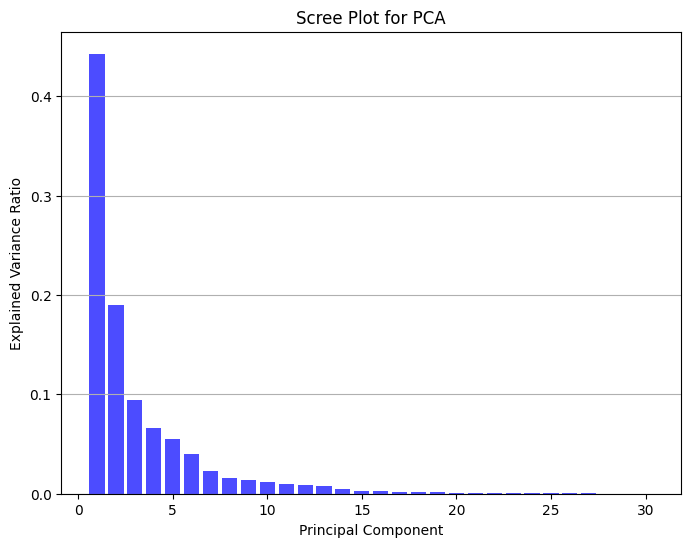

In [4]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Create the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='b', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.grid(axis='y')
plt.show()
# The Scree Plot can be used to manually observe 
